In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env
from env import get_db_url
from pydataset import data


# Statistics 

### Applied Statistics

### Inferential = used to generalize about a population based on a sample of data. E.G. 5% of customers churned last month ---> 5% of customers will churn every month 

### Hypothesis Testing 

1. Make inferences from the sample and generalize them to the population 

2. Compares, tests and predicts future outcomes. 

3. Final result is the probability scores 

4. Draws conclusions about the population that is beyond the data available

### Steps to Hypothesis Tests 

1. Choose the right type of test for your data/question 

2. Set a desired confidence level and form hypothesis

3. Calculate the appropriate test statistics and p-value

4. Conclude based on the above statistics

Exercises

### Has the network latency gone up since we switched internet service providers? 

Is our new network latency (new_provider_ping_test) higher than our previous network latency (old_provider_ping_test)?

H0: The network latency with our new provider is higher than the network latency we had with our previous provider

HA: The network latency with our new provider is not higher than the network latency we experienced with our old provider

Type 1 Error: Reject a true null hypothesis. The actual truth being the network latency with the new provider is higher than the network latency with the previous provider, but falsely rejecting it. 

Type 2 Error: Accept a false null hypothesis. The actual truth being the network latency with our new proivder is not higher than the network latency with our old provider but not rejecting it. 

### Is the Website redesign any good?

Was there an increase in user interaction (num_of_clicks) on the website after the redesign?

H0: The user interaction (num_of_clicks) after the website redesign is higher than (num_of_clicks) before the redesign

HA: The user interaction (num_of_clicks) after the redesign is not higher than the (num_of_clicks) before the redesign

Type 1 Error: Reject a true null hypothesis. The reality being the user interaction, based on number of clicks, after the website redesign is higher than before the redesign but falsely rejecting it

Type II Error: Accept a false null hypothesis. The reality being the user interaction after the redesign is not higher than the interaction before the redesign but not rejecting the null hypothesis 

### Is our television ad driving more sales? 

Do we see a spike in sales after our tv add? 

H0: The sales data increased significantly after the tv ad. 

HA: The sales data did not make any significant change after the tv ad. 

Type I Error: Reject a true null hypothesis. The reality being the sales data did increase significantly after the tv ad but inaccurately rejecting it

Type II Error: Accept a false null hypothesis: The reality being the sales data did not make any significant changes after the tv ad, but inaccurately not rejecting the null hypothesis. 

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [2]:
mean1 =90
std1 =15
count1= 40

mean2=100
std2=20
count2=50


In [3]:
t, p = stats.ttest_ind_from_stats(mean1, std1, count1, mean2, std2, count2, equal_var=True)

In [4]:
t

-2.6252287036468456

In [5]:
p

0.01020985244923939

# Load the mpg dataset and use it to answer the following questions:

In [6]:
alpha = 0.05

In [7]:
mpg = data('mpg')

In [8]:
car_99 = mpg[mpg["year"] == 1999]

In [9]:
car_99.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact


In [10]:

car_08 = mpg[mpg["year"] == 2008]

In [11]:
car_08.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
11,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact


In [12]:
mpg['avg_mpg'] = (mpg.hwy + mpg.hwy)/2

In [13]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.0
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,31.0
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,30.0
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,26.0


In [14]:
avg_99 = mpg.avg_mpg[mpg.year == 1999]

In [15]:
avg_08 = mpg.avg_mpg[mpg.year == 2008]

<AxesSubplot:>

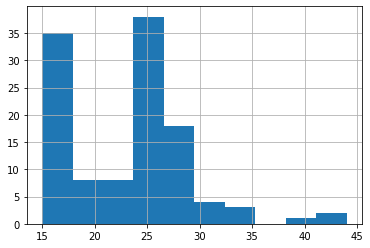

In [16]:
avg_99.hist()

<AxesSubplot:>

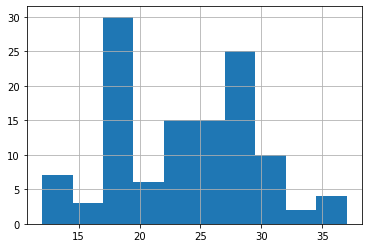

In [17]:
avg_08.hist()

### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [18]:
avg_08.count()

117

In [19]:
avg_99.count() #Normality is not an issue due to sample size 

117

In [20]:
avg_08.var(), avg_99.var()

(34.19820218096073, 37.02269378131447)

In [21]:
stats.levene(avg_08, avg_99)

LeveneResult(statistic=0.0212016152523693, pvalue=0.8843574825616618)

H0: Cars produced in 2008 have a better fuel-efficiency than cars produced in 1999

HA: Cars produced in 2008 do not have a better fuel-efficiency than cars produced in 1999

In [22]:
t, p = stats.ttest_ind(avg_99, avg_08, equal_var=False)

In [23]:
p

0.973811089269393

In [24]:
t

-0.03286431672888292

In [25]:
if p < alpha: 
    print("We reject the null hypothesis.")
else: 
    print("We fail to reject the null hypothesis.")

We fail to reject the null hypothesis.


### Are compact cars more fuel-efficient than the average car?

H0: Compact cars are more fuel-efficient

HA: Compact cars are not more fuel-efficient

In [28]:
f_compact = mpg[mpg['class'] == 'compact'].avg_fe
pop_mean = mpg.avg_f.mean()

AttributeError: 'DataFrame' object has no attribute 'avg_fe'

In [ ]:
#calculate the t and p values 
t, p = stats.ttest_lsamp(f_compact, pop_mean)
t, p 

In [ ]:
if (p/2 < alpha) and t > 0:
    print('reject null')

In [ ]:
if p < alpha: 
    print("We reject the null hypothesis.")
else: 
    print("We fail to reject the null hypothesis.")

### Do manual cars get better gas mileage than automatic cars?

In [ ]:
histogram 

H0: Manual cars get better gas mileage than automatic cars. 

HA: Manual cars do not get better gas mileage than automatic cars. 

In [29]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe

AttributeError: 'DataFrame' object has no attribute 'avg_fe'

In [ ]:
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

In [27]:
fe_auto.var(), fe_manual.var()

NameError: name 'fe_auto' is not defined

In [ ]:
stats.levene(fe_auto, fe_manual)

In [ ]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2

In [ ]:
fe_manual.mean(), fe_auto.mean()

In [ ]:
if p < alpha: 
    print("We reject the null hypothesis.")
else: 
    print("We fail to reject the null hypothesis.")